<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202510_AML/blob/main/Talleres/Taller%203/MINE_4206_202510_AML_Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Taller 3**

- **Integrante 1:** Diego Felipe Carvajal Lombo - 201911910
- **Integrante 2:** Maria Alejandra Pérez Petro- 201923972

### **Problemática**:
Vivimos en una era digital en la que el acceso a la información es más rápido y amplio que nunca. A través de Internet, las personas pueden acceder a noticias y contenido de manera instantánea desde diversas plataformas: sitios web, redes sociales, blogs y aplicaciones móviles. Sin embargo, esta democratización de la información también ha traído consigo un desafío creciente: la proliferación de noticias falsas o fake news.

Las noticias falsas son informaciones intencionadamente distorsionadas, manipuladas o completamente inventadas, que se difunden con el fin de generar confusión, engañar a la audiencia, manipular la opinión pública o influir en decisiones políticas y sociales. El impacto de las fake news puede ser considerable. Por ejemplo, a nivel social, pueden crear pánico, generar desconfianza en las instituciones o alterar las percepciones de eventos importantes. A nivel político, las noticias falsas han sido utilizadas para influir en elecciones, sembrar división entre grupos sociales o tergiversar la realidad en temas de relevancia pública.

La magnitud del problema es tal que diversas organizaciones y gobiernos han comenzado a tomar medidas para combatir la desinformación, promoviendo el uso de tecnologías para detectar y verificar la veracidad de la información. En este contexto, el desarrollo de modelos automatizados que puedan identificar noticias falsas con alta precisión se ha convertido en una necesidad urgente.
El uso de técnicas de Procesamiento de Lenguaje Natural (NLP) y modelos de clasificación es crucial para poder abordar este reto de manera efectiva. Dado que el mercado y las plataformas digitales están saturados de información, el poder contar con un sistema automático que permita a los usuarios filtrar las noticias confiables de las falsas es esencial para mantener un entorno informativo saludable, preciso y responsable.

### **Objetivos:**

* Desarrollar una solución, basada en técnicas de procesamiento de lenguaje natural y machine learning, que facilite el análisis de información textual para la identificación de noticias falsas en español.

### **Conjunto de datos:**
> El conjunto de datos contiene noticias reales obtenidas mediante web scraping de sitios web de diferentes medios informativos. Además, incluye noticias falsas que fueron creadas modificando los datos de las noticias reales, así como noticias falsas generadas por inteligencia artificial.

El diccionario de los datos es el siguiente:
* **Label**. Es una etiqueta que indica si la noticia es verdadera o falsa. Toma el valor 1 si la noticia es verdadera y 0 si es falsa.
* **Título**. Contiene el titular de la noticia. Es una breve descripción que resume el contenido principal de la noticia.
* **Descripción**. Proporciona una descripción de la noticia, que se incluye detalles adicionales sobre el tema o los acontecimientos mencionados en la noticia.

Los datos se encuentran en el [repositorio de github](https://github.com/fcastellanosp/MINE-4206_202510_AML/blob/main/Talleres/Taller%203/Noticias_datos.xlsx).

### **Actividades a realizar:**
1.	Preparación de los textos utilizando el esquema de bolsa de palabras (BOW) con una pesado TF-IDF. Para este paso construir un pipeline que integre las transformaciones que se consideren adecuadas.
2.	Desarrollo de un modelo de clasificación que permita identificar si un texto corresponde a una noticia falsa o no. Para la construcción de este clasificador utilice Naïve Bayes (https://scikit-learn.org/stable/modules/naive_bayes.html).
3.	Evaluación del modelo con textos que no hayan sido utilizados para el aprendizaje.

### **Entregable:**

Notebook (*.ipynb y *.html) por la plataforma. El Notebook debe estar documentado con las justificaciones de las decisiones tomadas en cada paso del ciclo de machine learning y las respuestas a las preguntas planteadas en el apartado D. Además, deben ser visibles las ejecuciones de cada celda. Esta entrega debe realizarse en la sexta semana, en donde encontrarás un espacio para adjuntar los dos archivos.

> **NOTAS IMPORTANTES:**
> La rúbrica se encuentra disponible en bloque neón.
> - El archivo se debe subir a BloqueNeon en el apartado de 'Actividades' y debe ser en formato .ipynb, ejecutado. **Celda que no esté ejecutada no será evaluada.**
> - El Notebook debe estar documentado con las justificaciones de las decisiones tomadas en cada paso del ciclo de ML.
> - El nombre del archivo debe ser `taller_2_{Apellido_Nombre}_{Apellido_Nombre}` de cada integrante.

---
# 0. Instalación, importación y configuración inicial

## Instalación

In [ ]:
!pip install pandas
!pip install ydata-profiling

## Importación de librerías

In [ ]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.decomposition import NMF, LatentDirichletAllocation

#Nltk
import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Otras librerías
from wordcloud import WordCloud, STOPWORDS
import unicodedata, re
import inflect
from scipy.sparse import hstack
from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")

La versión de sklearn es: 1.6.1


In [ ]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

## Funciones de apoyo.

Función para cálculo de tiempo, ideal para procesos extensos:

In [ ]:
def timer(start_time=None):
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

Para visualizar la matriz de confusión:

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(4, 4)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Para visualizar la curva ROC:

In [ ]:
def display_multiple_models_roc_curve(models, X, y):
  # Below for loop iterates through your models list
  for m in models:
    model = m['model'] # select the model
    y_pred=model.predict(X) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y,y_pred)
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
  # Custom settings for the plot
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('1-Specificity(False Positive Rate)')
  plt.ylabel('Sensitivity(True Positive Rate)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()   # Display

función para graficar un wordcloud:

In [ ]:
def show_wordcloud(words, stopwords=[]):
  comment_words = ''

  # iterate through the csv file
  for val in words:
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
                        background_color ='white', stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

## Parámetros generales

In [ ]:
#Porcentaje para validación y test
test_val_alpha = 0.2
#random_state o semilla para la reproducibilidad
my_seed = 77

In [ ]:
STOPWORDS = set(stopwords.words('spanish'))

## Carga del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ROOT_DIR = '/content/drive/My Drive/ML/Taller3'
DATASET_NAME = 'Noticias_datos.xlsx'
data_df = pd.read_excel(f'{ROOT_DIR}/{DATASET_NAME}')


Revisamos las primeras filas del dataset y vemos que no se leyó correctamente. Hay caracteres que no se reconocen.

In [ ]:
data_df.head()

,Label,Titulo,Descripcion
0,1,Moreno intenta apaciguar el flanco sanitario m...,El presidente abre la puerta a unos comicios e...
1,1,La AbogacÃ­a del Estado se retira como acusaci...,"En un escrito, la abogada del Estado Rosa MarÃ..."
2,0,Las promesas incumplidas de Pablo Echenique en...,Este lunes y martes la Asamblea de Madrid acog...
3,1,SÃ¡nchez defiende 'resolver el problema' de la...,Resulta evidente que la ley ha tenido algunos ...
4,1,Ian Gibson cierra la lista electoral de la con...,"El hispanista, que ya ocupÃ³ un puesto simbÃ³l..."


Por lo que, se procede a generar un csv del excel y luego, realizar un cambio en el formato de codificación  `encoding = "utf-8"`

In [ ]:
ROOT_DIR = '/content/drive/My Drive/ML/Taller3'
DATASET_NAME = 'Noticias_datos.csv'
data_df = pd.read_csv(f'{ROOT_DIR}/{DATASET_NAME}', encoding = "utf-8" , sep=';')

Ahora vemos que los datos cargados en el dataframe si se leen correctamente

In [ ]:
data_df.head()

,Label,Titulo,Descripcion
0,1,Moreno intenta apaciguar el flanco sanitario m...,El presidente abre la puerta a unos comicios e...
1,1,La Abogacía del Estado se retira como acusació...,"En un escrito, la abogada del Estado Rosa Marí..."
2,0,Las promesas incumplidas de Pablo Echenique en...,Este lunes y martes la Asamblea de Madrid acog...
3,1,Sánchez defiende 'resolver el problema' de la ...,Resulta evidente que la ley ha tenido algunos ...
4,1,Ian Gibson cierra la lista electoral de la con...,"El hispanista, que ya ocupó un puesto simbólic..."


# 1. Análisis Exploratorio y Limpieza de Datos

## 1.1 Introducción a los datos

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57231 entries, 0 to 57230
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Label        57231 non-null  int64 
 1   Titulo       57231 non-null  object
 2   Descripcion  57231 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


Revisamos los duplicados

In [ ]:
data_df.duplicated().sum()


np.int64(466)

In [ ]:
data_df.drop_duplicates(inplace=True)

In [ ]:
# Variable objetivo
target_feature = 'Label' # Binaria: 1 = Noticia Verdadera, 0 = Noticia Falsa


Distribución de la variable objetivo en el dataset

,Conteo,Porcentaje (%)
Label,,
1,32914,57.982912
0,23851,42.017088


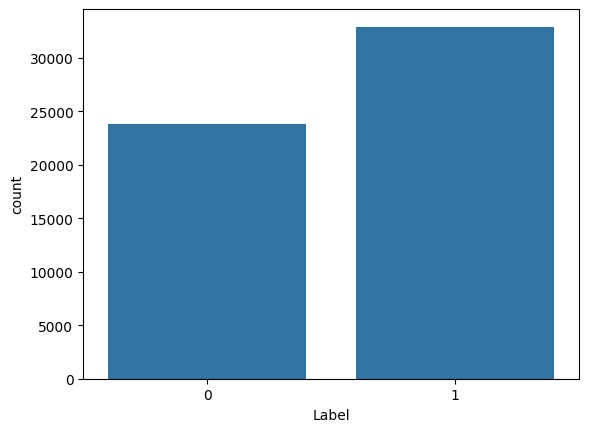

In [ ]:
sns.countplot(data_df, x=target_feature)
df_porcentage = pd.DataFrame(data_df[target_feature].value_counts())
df_porcentage.columns = ['Conteo']
df_porcentage['Porcentaje (%)'] = df_porcentage['Conteo']/df_porcentage['Conteo'].sum()*100
df_porcentage

## 1.2 Separación de la información

Se dividen los datos en conjuntos de entrenamiento y prueba, reservando un 20% para la evaluación. Se establece un parámetro de reproducibilidad (random_state) para asegurar resultados consistentes.

In [ ]:
train, test = train_test_split(data_df, test_size=test_val_alpha, random_state=my_seed)
train.head()

,Label,Titulo,Descripcion
22139,0,VOX pide al juez de Púnica y Lezo que se inves...,Resulta más que evidente que los elementos con...
11497,0,El presidente del TC: 'Reformar la Constitució...,Así se ha expresado Juana Ruiz en una entrevis...
6140,0,Telemadrid cesa a los presentadores de los inf...,Los trabajadores de Telemadrid acusan al Gobie...
44838,1,Iñaki Urdangarin obtendrá su primer permiso pe...,El secretario general de Instituciones Peniten...
46790,0,Trump se despide como un pacifista: 'El primer...,"El presidente saliente de Estados Unidos, Tani..."


In [ ]:
print("-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------")
print("Tamaño de datos de entrenamiento:", train.shape)
print("Tamaño de datos de prueba:", test.shape)

-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------
Tamaño de datos de entrenamiento: (45412, 3)
Tamaño de datos de prueba: (11353, 3)


Se realiza una copia del conjunto de datos de entrenamiento, validación y prueba para asegurar la preservación de los datos originales.

In [ ]:
new_train = train.copy()
new_test = test.copy()

## 1.3 Exploración y perfilamiento de los datos

In [ ]:
ProfileReport(new_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:13<00:00,  4.59s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 Generamos wordcloud retirando las stopwords.

---------- Palabras en 'Título' para la clase: 0 ----------


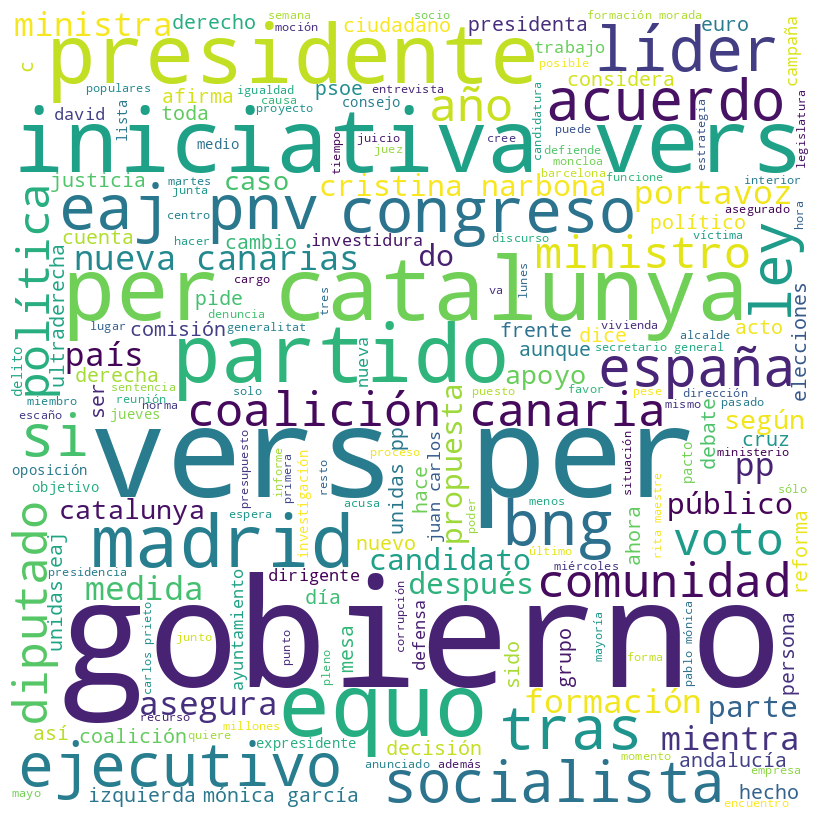

---------- Palabras en 'Título' para la clase: 1 ----------


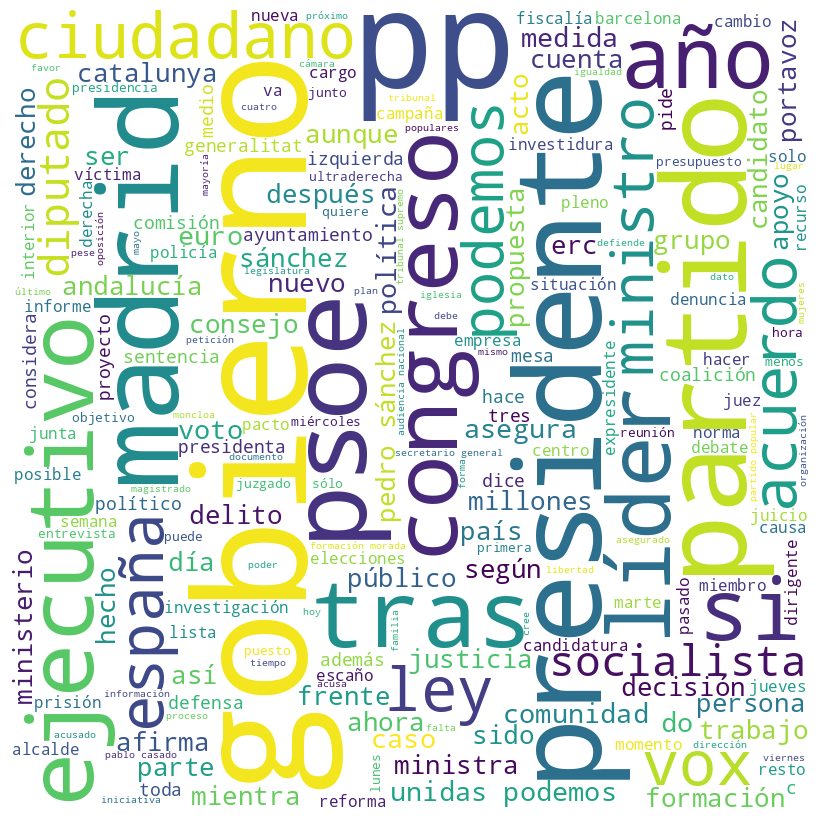

---------- Palabras en 'Descripción' para la clase: 0 ----------


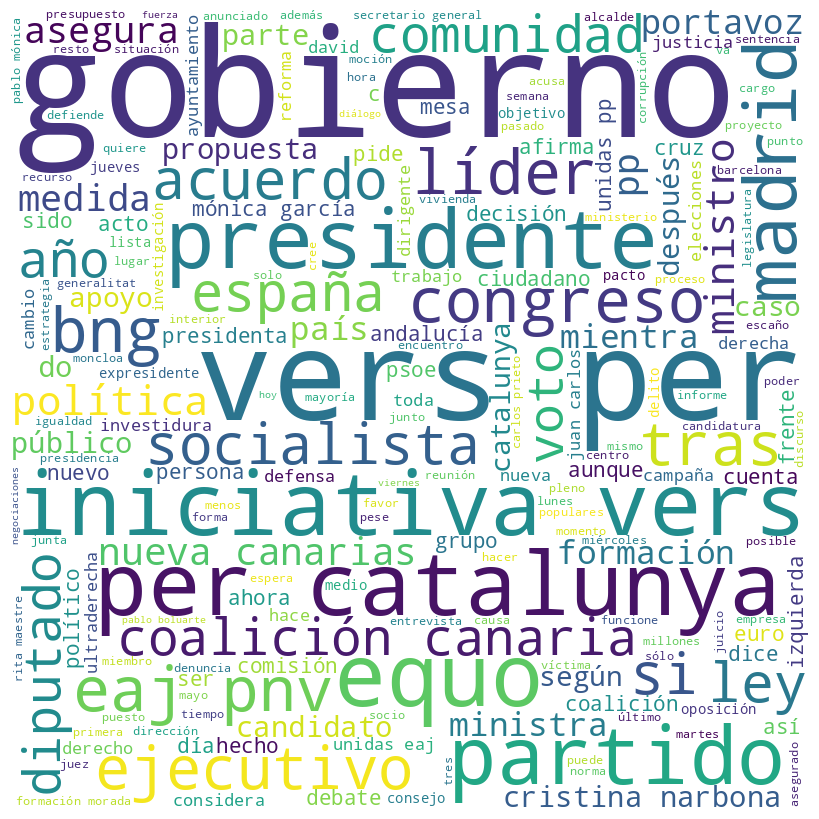

---------- Palabras en 'Descripción' para la clase: 1 ----------


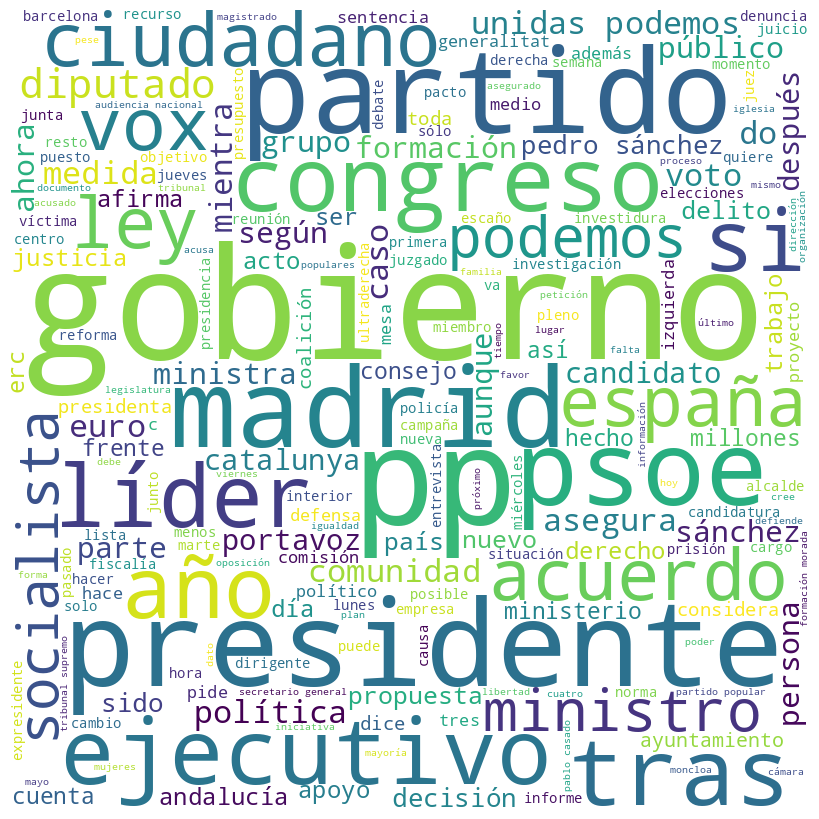

In [ ]:
features = ['Título', 'Descripción']
for feature in features:
  for i in range(2):
    print(f'---------- Palabras en \'{feature}\' para la clase: {i} ----------')
    show_wordcloud(new_train.loc[new_train['Label']==(i), 'Descripcion'], STOPWORDS)

## 1.4. Insights obtenidos de la información.

- Al examinar la nube de palabras hay algunas palabras en catalán, no solo en español. Algunas de las que se distinguen claramente son:

  - Catalunya (Cataluña), Per (Por), Vers (Hacia/Verso), Nova (Nueva), Pnv (Siglas del Partido Nacionalista Vasco, aunque podría aparecer en contextos relacionados con política catalana), Eaj (Siglas de Eusko Alkartasuna, otro partido vasco, misma observación que PNV)




- La nube de palabras sugiere que las noticias en el datset están relacionadas a un contexto politico en España.

- No se observan diferencias significativas en el estilo del lenguaje o el uso de palabras entre las columnas "Título" y "Descripción". Por lo que se podria optar por una bolsa de palabras conjunta para ambas features.

# 2. Preprocesamiento

## 2.1 Preparación de la información

In [ ]:
def intial_preprocess(df):
  df = df.drop_duplicates() # Eliminamos duplicados
  X_data, y_variable = df.drop([target_feature], axis=1), df[target_feature] # Separación de variable objetivo de las variables descriptoras
  y_variable = y_variable.astype(int)
  return X_data, y_variable

Finalmente, vamos a separar la variable objetivo de los textos, que se convertirán en las variables descriptoras:

In [ ]:
X_train, Y_train = intial_preprocess(new_train)
X_test, Y_test = intial_preprocess(new_test)

In [ ]:
X_train

,Titulo,Descripcion
22139,VOX pide al juez de Púnica y Lezo que se inves...,Resulta más que evidente que los elementos con...
11497,El presidente del TC: 'Reformar la Constitució...,Así se ha expresado Juana Ruiz en una entrevis...
6140,Telemadrid cesa a los presentadores de los inf...,Los trabajadores de Telemadrid acusan al Gobie...
44838,Iñaki Urdangarin obtendrá su primer permiso pe...,El secretario general de Instituciones Peniten...
46790,Trump se despide como un pacifista: 'El primer...,"El presidente saliente de Estados Unidos, Tani..."
...,...,...
7838,Abogados del 'procés' analizan el camino en el...,EQUO cree que el cambio de criterio del Suprem...
42572,Las promesas del Gobierno de Sánchez: con fren...,"La reforma laboral, el cambio del modelo de fi..."
18697,Juanma Guijo (Más Madrid): 'Tenemos que crear ...,"La activista Juanma Guijo, defensora de los de..."
8806,Polémica por la propuesta de reforma del siste...,La propuesta de reforma del sistema de pension...


In [ ]:
Y_train

,Label
22139,0
11497,0
6140,0
44838,1
46790,0
...,...
7838,0
42572,1
18697,0
8806,0


Revisamos la distribución de la varibale objetivo en el conjunto de entrenamiento:

In [ ]:
df_target = pd.DataFrame()
df_target['Conteo'] = Y_train.value_counts()
df_target['Porcentaje (%)'] = df_target['Conteo']/df_target['Conteo'].sum()*100
df_target

,Conteo,Porcentaje (%)
Label,,
1,26392,58.116797
0,19020,41.883203


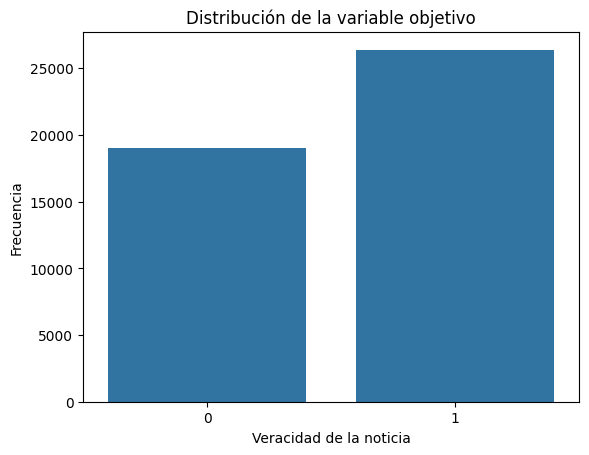

In [ ]:
sns.countplot(x = Y_train)
plt.xlabel('Veracidad de la noticia')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable objetivo')
plt.show()

## 2.2. Procesamiento de textos

En esta sección se realizan todos los pasos del procesamiento de textos: tokenización, eliminación de palabras vacías y stemming.



Para esto se define y utiliza la función `text_preprocess()` que realiza:
1. Tokenización
  - `tokenizer = RegexpTokenizer(r'\w+')`: Esta línea crea un objeto tokenizer utilizando la clase `RegexpTokenizer` de la librería nltk. La expresión regular `r'\w+'` se utiliza para definir el patrón de tokenización. Este patrón coincide con uno o más caracteres de palabra (letras, números y guion bajo). Esto esencialmente significa que el tokenizer dividirá el texto en palabras y números individuales, descartando la puntuación y otros caracteres especiales.
2. Eliminación de palabras vacías (`STOPWORDS`)
3. Stemming
  - `stemmer = PorterStemmer()`: Esta línea crea un objeto stemmer utilizando la clase `PorterStemmer` de nltk. El stemming es una técnica para reducir las palabras a su forma raíz. Por ejemplo, "running", "runs" y "ran" se reducirían a "run".

  



In [ ]:
def text_preprocess(text):
  tokenizer = RegexpTokenizer(r'\w+')
  stemmer = PorterStemmer()

  tokens = tokenizer.tokenize(text)
  tokens = [word for word in tokens if word not in STOPWORDS]
  tokens = [stemmer.stem(word) for word in tokens]
  return ' '.join(tokens)

Adicionalmente, definiremos un objeto de la clase `TfidfVectorizer()` con el parámetro `preprocessor` para, de esa forma, tener un preprocesamiento y transformación de un texto a la representación de bolsa de palabras. `TfidfVectorizer` va más allá del simple conteo al ponderar las palabras según su frecuencia en el documento y su rareza en el corpus.

In [ ]:
vectorizer = TfidfVectorizer(preprocessor=text_preprocess)

Dado que el objetivo es clasificar artículos de noticias en noticias falsas o verdaderas, se utilizará el mismo `TfidfVectorizer` para ambas features ("Título" y "Descripción"). Esto se debe a que con un único `TfidfVectorizer` se crea un vocabulario unificado tanto para el título como para la descripción, lo que consideramos podría ser crucial para identificar noticias falsas.

In [ ]:
def combine_text_columns(df, text_features=None):

    if text_features is None:
        text_features = df.columns.tolist()

    def combine_row_text(row):
        combined_text_list = [str(row[feature]) for feature in text_features]
        return ' '.join(combined_text_list)

    df["combined_text_features"] = df.apply(combine_row_text, axis=1)
    return df

:Revisamos el tamaño de nuestro conjunto de entrenamiento antes de crear nuestro esquema de bolsa de palabras (BOW) con una pesado TF-IDF.

In [ ]:
print("Tamaño del conjunto de Entrenamiento:", X_train.shape)

Tamaño del conjunto de Entrenamiento: (45412, 2)


Vamos a transformar nuestro conjunto de entrenamiento:

In [ ]:
X_train_combine = combine_text_columns(X_train)["combined_text_features"]
X_train_ = vectorizer.fit_transform(X_train_combine)
X_train_

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1302932 stored elements and shape (45412, 37377)>

Revisamos el tamaño de nuestro conjunto de entrenamiento una vez creada nuestra bolsa de palabras:

In [ ]:
print("Tamaño del conjunto de Entrenamiento:", X_train_.shape)

Tamaño del conjunto de Entrenamiento: (45412, 37377)


# 3. Modelamiento: Naive Bayes

## 3.1. Modelo Base

Nuestra variable objetivo `y_train` es binaria, es decir, tenemos una sola clase.

In [ ]:
Y_train.value_counts()

,count
Label,
1,26392
0,19020


### Pipeline

Pipeline del preprocesamiento

In [ ]:
preprocessor = Pipeline(
    steps=[
    ('combinar_textos', FunctionTransformer(lambda x: x['Titulo'] + ' ' + x['Descripcion'], validate=False)),
    ('vectorizer', TfidfVectorizer(preprocessor=text_preprocess, norm="l2")),
    ('dim_reduction', 'passthrough')
    ]
)


In [ ]:
#Vista previa de cómo va el preprocesamiento de información hasta este momento:
pipe = Pipeline(steps=[
    ('column_transformer', preprocessor)
])

In [ ]:
pipe

Pipeline(steps=[('column_transformer',
                 Pipeline(steps=[('combinar_textos',
                                  FunctionTransformer(func=<function <lambda> at 0x7a33525d6480>)),
                                 ('vectorizer',
                                  TfidfVectorizer(preprocessor=<function text_preprocess at 0x7a33525d4180>)),
                                 ('dim_reduction', 'passthrough')]))])

In [ ]:
pipe.fit_transform(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1302932 stored elements and shape (45412, 37377)>

Nuestro pipeline completo:

In [ ]:
estimators = [
        ('transform', preprocessor),
        ('classifier', BernoulliNB())

]
pipe_bm = Pipeline(estimators)


### Entrenamiento

In [ ]:
start_time = timer(None)
pipe_bm.fit(X_train, Y_train)
timer(start_time) # Función para visualizar la duración del proceso, recomendado para procesos extensos y cuantificar este tiempo.
y_pred_train_bm = pipe_bm.predict(X_train)
y_pred_train_bm


 Time taken: 0 hours 0 minutes and 32.46 seconds.


array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
classes = pipe_bm[1].classes_
classes

array([0, 1])

Vamos a ver ahora el comportamiento de la matriz de confusión para el modelo base:

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión (Entrenamiento)'}, xlabel='Predicted label', ylabel='True label'>

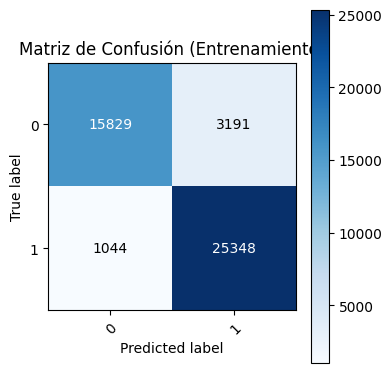

In [ ]:
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_train_bm, classes=classes,normalize=False,
                      title='Matriz de Confusión (Entrenamiento)')

In [ ]:
train_report_bm = classification_report(Y_train, y_pred_train_bm)
print("Train Report\n", train_report_bm)

Train Report
               precision    recall  f1-score   support

           0       0.94      0.83      0.88     19020
           1       0.89      0.96      0.92     26392

    accuracy                           0.91     45412
   macro avg       0.91      0.90      0.90     45412
weighted avg       0.91      0.91      0.91     45412



Veamos la curva ROC:

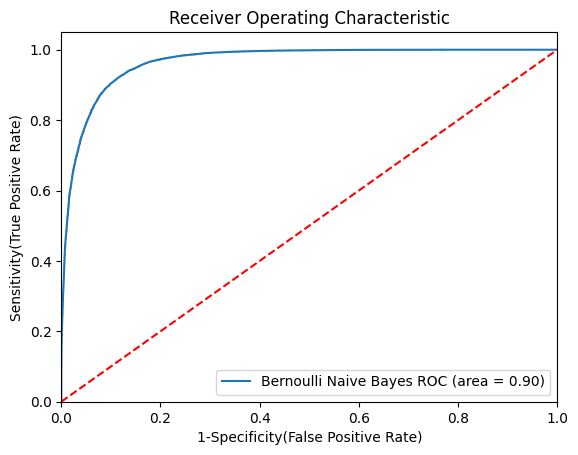

In [ ]:
models = [
    {
        'label': 'Bernoulli Naive Bayes',
        'model': pipe_bm,
    }
]


display_multiple_models_roc_curve(models, X_train, Y_train)

## 3.2. Búsqueda de hiperparámetros.

Para la busqueda de hiperparametros se decidió trabajar con:

`transform__vectorizer_norm: ['l1', 'l2']`

El hiperparámetro `norm` pertenece al paso de vectorización del pipeline (denominado 'transform')

norm: Especifica la norma a utilizar para normalizar los vectores de características. La normalización puede ayudar a mejorar el rendimiento del modelo al escalar las características a un rango similar.
  - 'l1': Norma L1 (Manhattan). La suma de los valores absolutos de los elementos del vector es igual a 1.
  - 'l2': Norma L2 (Euclidiana). La raíz cuadrada de la suma de los cuadrados de los elementos del vector es igual a 1.
  

`classifier__alpha: [0.01, 0.1, 1.0]`
El hiperparámetro `alpha` pertenece al clasificador BernoulliNB() (denominado 'classifier').

alpha: Este es el parámetro de suavizado aditivo (Laplace/Lidstone). Suaviza las probabilidades de las palabras para evitar la probabilidad cero cuando una palabra aparece en una clase en el conjunto de prueba pero no en el conjunto de entrenamiento para esa clase. Valores más pequeños (como 0.01) dan menos suavizado, mientras que valores más grandes (como 1.0) dan más suavizado.


`classifier__fit_prior: [True, False]`

El hiperparámetro `fit_prior` también pertenece al clasificador BernoulliNB().

fit_prior: Un booleano que especifica si se deben aprender las probabilidades previas de las clases a partir de los datos de entrenamiento.
  - True (valor por defecto): Las probabilidades previas de cada clase se estiman en función de la frecuencia de las clases en el conjunto de entrenamiento. Por ejemplo, si hay más noticias verdaderas que falsas en el entrenamiento, el modelo tendrá una mayor probabilidad previa de clasificar una nueva noticia como verdadera.
  - False: Se asume una probabilidad previa uniforme para todas las clases. Esto significa que el modelo asume que cada clase es igualmente probable al principio.
Es decir, este hiperparametro está probando si es mejor dejar que el modelo aprenda las proporciones de las clases en tus datos de entrenamiento o asumir que ambas clases son igualmente probables a priori.

In [ ]:
estimators_best = [
        ('transform', preprocessor),
        ('classifier', BernoulliNB())

]
pipe_best = Pipeline(estimators)

# Parametros de la busqueda
"""parameters = {
              'transform__dim_reduction': [ NMF(random_state=my_seed), LatentDirichletAllocation(random_state=my_seed), 'passthrough'],
              }"""

parameters = {
    'transform__vectorizer__norm': ["l1", "l2"],
    'classifier__alpha': [0.01, 0.1, 1.0],
    'classifier__fit_prior': [True, False]
    }
grid_search = GridSearchCV(pipe_best, parameters, verbose=1, scoring='recall', cv=3)

Se decide maximizar el scoring recall, dado que es más grave tener falsos negativos; que existan fake news que el modelo diga que son verdaderas.

In [ ]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transform',
                                        Pipeline(steps=[('combinar_textos',
                                                         FunctionTransformer(func=<function <lambda> at 0x7a33525d6480>)),
                                                        ('vectorizer',
                                                         TfidfVectorizer(preprocessor=<function text_preprocess at 0x7a33525d4180>)),
                                                        ('dim_reduction',
                                                         'passthrough')])),
                                       ('classifier', BernoulliNB())]),
             param_grid={'classifier__alpha': [0.01, 0.1, 1.0],
                         'classifier__fit_prior': [True, False],
                         'transform__vectorizer__norm': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [ ]:
df_grid_search = pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__alpha,param_classifier__fit_prior,param_transform__vectorizer__norm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,19.567748,0.462671,9.599320,0.410419,0.01,True,l1,"{'classifier__alpha': 0.01, 'classifier__fit_p...",0.813253,0.814141,0.814028,0.813807,0.000395,9
1,18.244823,0.053460,10.062040,0.032184,0.01,True,l2,"{'classifier__alpha': 0.01, 'classifier__fit_p...",0.813253,0.814141,0.814028,0.813807,0.000395,9
2,18.847093,0.855144,10.067873,0.029232,0.01,False,l1,"{'classifier__alpha': 0.01, 'classifier__fit_p...",0.798477,0.799250,0.797545,0.798424,0.000697,11
3,18.175454,0.024073,10.086426,0.036015,0.01,False,l2,"{'classifier__alpha': 0.01, 'classifier__fit_p...",0.798477,0.799250,0.797545,0.798424,0.000697,11
4,18.212107,0.039977,10.066889,0.024426,0.10,True,l1,"{'classifier__alpha': 0.1, 'classifier__fit_pr...",0.854285,0.861316,0.858247,0.857950,0.002878,5
5,18.571529,0.294088,9.636496,0.338884,0.10,True,l2,"{'classifier__alpha': 0.1, 'classifier__fit_pr...",0.854285,0.861316,0.858247,0.857950,0.002878,5
6,19.356054,0.477654,9.482248,0.401673,0.10,False,l1,"{'classifier__alpha': 0.1, 'classifier__fit_pr...",0.837122,0.845402,0.841992,0.841505,0.003398,7
7,19.852909,0.171422,8.450864,0.168161,0.10,False,l2,"{'classifier__alpha': 0.1, 'classifier__fit_pr...",0.837122,0.845402,0.841992,0.841505,0.003398,7
8,19.956561,0.051175,8.449994,0.179145,1.00,True,l1,"{'classifier__alpha': 1.0, 'classifier__fit_pr...",0.918277,0.925656,0.919291,0.921075,0.003266,1
9,19.084698,0.315594,9.649363,0.378267,1.00,True,l2,"{'classifier__alpha': 1.0, 'classifier__fit_pr...",0.918277,0.925656,0.919291,0.921075,0.003266,1


In [ ]:
columns_df_grid_search = [ "rank_test_score", "mean_test_score", "std_test_score","param_transform__vectorizer__norm", "param_classifier__alpha", "param_classifier__fit_prior"]
df_grid_search[columns_df_grid_search]

,rank_test_score,mean_test_score,std_test_score,param_transform__vectorizer__norm
0,9,0.813807,0.000395,l1
1,9,0.813807,0.000395,l2
2,11,0.798424,0.000697,l1
3,11,0.798424,0.000697,l2
4,5,0.857950,0.002878,l1
5,5,0.857950,0.002878,l2
6,7,0.841505,0.003398,l1
7,7,0.841505,0.003398,l2
8,1,0.921075,0.003266,l1
9,1,0.921075,0.003266,l2


#### Mejor modelo

El mejor modelo utiliza

In [ ]:
print(f"Mejores parámetros: {grid_search.best_params_}")

Mejores parámetros: {'classifier__alpha': 1.0, 'classifier__fit_prior': True, 'transform__vectorizer__norm': 'l1'}


Almacenaremos el mejor modelo utilizando `grid_search.best_estimator_`:

In [ ]:
best_model = grid_search.best_estimator_

## 3.3 Resultados

### Evaluación (Entrenamiento)

In [ ]:
y_pred_train_best = best_model.predict(X_train)
y_pred_train_best

array([0, 1, 0, ..., 0, 0, 0])

###### Matriz de confusión

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión Best Naive Bayes (Entrenamiento)'}, xlabel='Predicted label', ylabel='True label'>

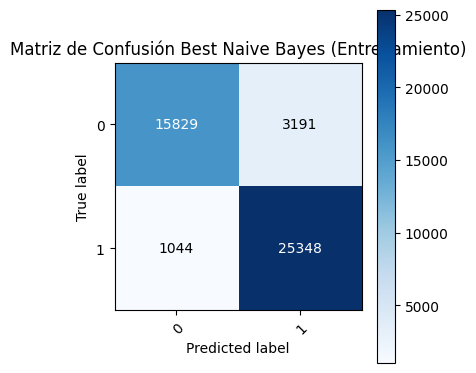

In [ ]:
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_train_best, classes=classes,normalize=False,
                      title='Matriz de Confusión Best Naive Bayes (Entrenamiento)')

###### Métricas

In [ ]:
train_report_best = classification_report(Y_train, y_pred_train_best)
print("Train Report\n", train_report_best)

Train Report
               precision    recall  f1-score   support

           0       0.94      0.83      0.88     19020
           1       0.89      0.96      0.92     26392

    accuracy                           0.91     45412
   macro avg       0.91      0.90      0.90     45412
weighted avg       0.91      0.91      0.91     45412



###### Curva ROC

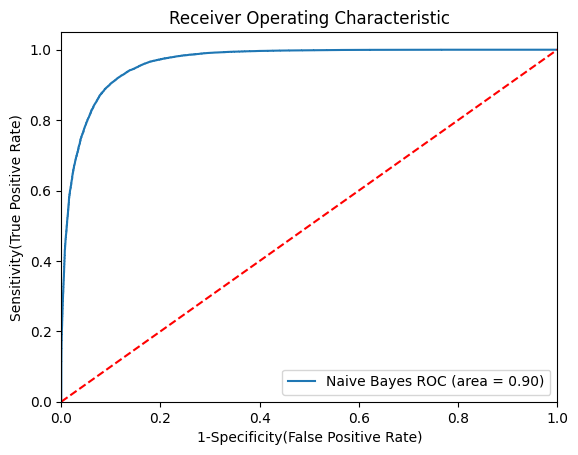

In [ ]:
models = [
    {
        'label': 'Naive Bayes',
        'model': best_model,
    }
]


display_multiple_models_roc_curve(models, X_train, Y_train)

### Evaluación (Test)

In [ ]:
y_pred_test_best = best_model.predict(X_test)
y_pred_test_best

array([1, 1, 0, ..., 1, 1, 0])

###### Matriz de confusión

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión Best Naive Bayes (Test)'}, xlabel='Predicted label', ylabel='True label'>

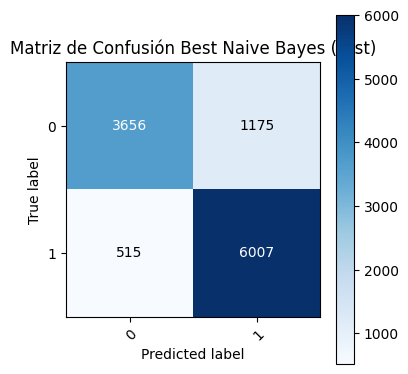

In [ ]:
plot_confusion_matrix(y_true=Y_test, y_pred=y_pred_test_best, classes=classes,normalize=False,
                      title='Matriz de Confusión Best Naive Bayes (Test)')

###### Métricas

In [ ]:
test_report_best = classification_report(Y_test, y_pred_test_best)
print("Test Report\n", test_report_best)

Test Report
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      4831
           1       0.84      0.92      0.88      6522

    accuracy                           0.85     11353
   macro avg       0.86      0.84      0.84     11353
weighted avg       0.85      0.85      0.85     11353



Para la clase 0  (noticias falsas)  tenemos que:

- La precisión fue de 0.88, es decir, de todas las noticias que el modelo predijo como falsas, el 88% realmente lo eran. Como tenemos una precisión alta para la clase 0 es muy probable que cuando el modelo dice que una noticia es falsa esté en lo correcto.
- El recall fue de 0.76, es decir, de todas de todas las noticias que realmente eran falsas, el modelo identificó correctamente el 76%. Este valor sugiere una buena capacidad para detectar la mayoría de las noticias falsas.


Para la clase  1 (Noticia Verdadera) tenemos que:

- La precisión fue de 0.84, indicando que el 84% de las noticias clasificadas como verdaderas por el modelo realmente lo eran.

- Un recall de 0.92 en la clase 1 indica que el modelo logró identificar el 92% de las noticias genuinamente verdaderas, mostrando una alta sensibilidad para esta categoría.


En el rendimiento general del modelo, tenemos un Accuracy (Exactitud) de 0.85. Esto nos indica que del total de noticias en el conjunto de prueba, el modelo clasificó correctamente el 85%. Esta es una métrica general de qué tan bien el modelo está haciendo predicciones correctas en general.


###### Curva ROC

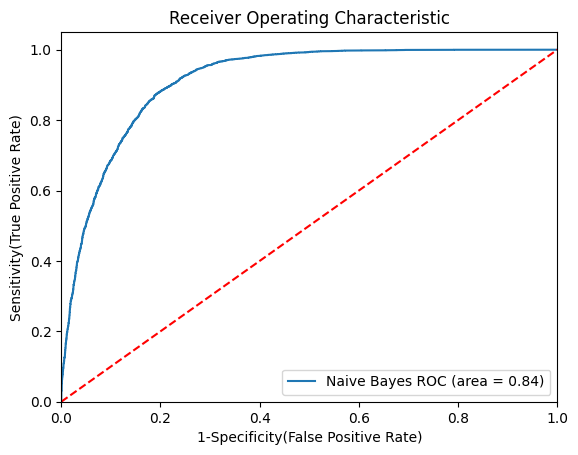

In [ ]:
models = [
    {
        'label': 'Naive Bayes',
        'model': best_model,
    }
]


display_multiple_models_roc_curve(models, X_test, Y_test)

La curva ROC muestra que el modelo Naive Bayes Bernoulli es significativamente mejor que una clasificación aleatoria (linea roja punteada) para distinguir entre noticias verdaderas y falsas. El AUC de 0.84 cuantifica este buen rendimiento general.


## 4. Conclusiones

El modelo tiene una capacidad de generalización muy buena, dado que los resultados de recall, precisión y accuracy son bastante parecidos tanto en el conjunto de entrenamiento como en el de test.

Como se mencionó antes, se trató de priorizar el scoring de recall, dado que es más grave decir que una fake news es real.

Además de su buena capacidad de generalización, el modelo tiene buenos resultados, con ello, una buena confiabilidad, ya que el accuracy general es de 0.85
